In [1]:
#install and download needed packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import scipy
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, StackingRegressor,BaggingRegressor,GradientBoostingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict,KFold
from sklearn.metrics import mean_squared_error,accuracy_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.decomposition import PCA
import statsmodels.api as sm
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv('AAPL.csv')

In [3]:
data.shape 

(7550, 7)

In [4]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1994-02-22,0.323661,0.334821,0.319196,0.332589,0.275511,214569600
1,1994-02-23,0.332589,0.341518,0.330357,0.332589,0.275511,260534400
2,1994-02-24,0.330357,0.332589,0.323661,0.327009,0.270888,197859200
3,1994-02-25,0.330357,0.332589,0.316964,0.321429,0.266266,236824000
4,1994-02-28,0.323661,0.330357,0.321429,0.325893,0.269964,123827200


In [5]:
data.index 

RangeIndex(start=0, stop=7550, step=1)

In [6]:
data=data.rename(columns={'Date':'date','Open':'open','High':'high','Low':'low','Close':'close','Volume':'volume'})

In [7]:
data=data.drop(columns=['Adj Close'],axis=1)

In [8]:
data['date']=pd.to_datetime(data['date'])

In [9]:
data.set_index('date', inplace=True)

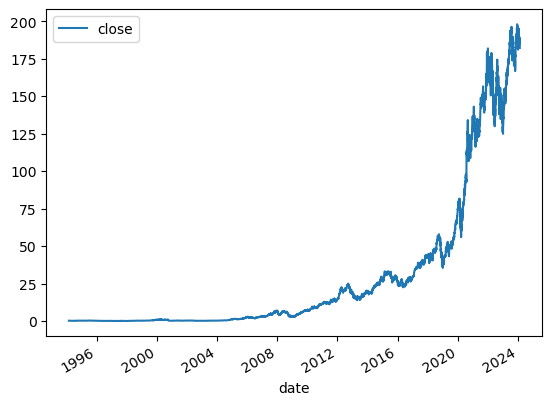

In [10]:
data.plot.line(y='close', use_index=True)
plt.savefig('apple.png');

In [11]:
data.describe()

,open,high,low,close,volume
count,7550.000000,7550.000000,7550.000000,7550.000000,7.550000e+03
mean,29.532990,29.853074,29.224866,29.553387,3.858050e+08
std,48.864621,49.396843,48.368104,48.910294,3.739202e+08
min,0.114955,0.118304,0.113839,0.115513,2.404830e+07
25%,0.394643,0.404687,0.388393,0.396071,1.340775e+08
50%,5.992679,6.074643,5.891786,6.006072,2.714544e+08
75%,30.680001,30.960625,30.422500,30.642500,5.006365e+08
max,198.020004,199.619995,197.000000,198.110001,7.421641e+09


In [12]:
data['Tomorrow']=data['close'].shift(-1)

In [13]:
data['previousday']=data['close'].shift(1)

In [14]:
data.head() 

,open,high,low,close,volume,Tomorrow,previousday
date,,,,,,,
1994-02-22,0.323661,0.334821,0.319196,0.332589,214569600,0.332589,NaN
1994-02-23,0.332589,0.341518,0.330357,0.332589,260534400,0.327009,0.332589
1994-02-24,0.330357,0.332589,0.323661,0.327009,197859200,0.321429,0.332589
1994-02-25,0.330357,0.332589,0.316964,0.321429,236824000,0.325893,0.327009
1994-02-28,0.323661,0.330357,0.321429,0.325893,123827200,0.323661,0.321429


In [15]:
train = data.iloc[:-200]
test = data.iloc[-200:]

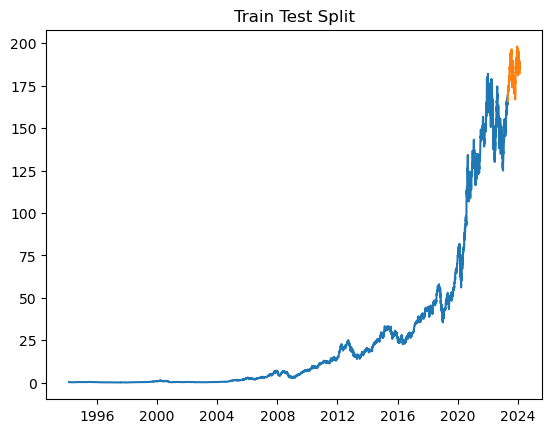

In [16]:
import matplotlib.pyplot as plt 
plt.plot(train['close'], label='train')
plt.plot(test['close'], label='test')
plt.title('Train Test Split');

In [17]:
# Utility function
def evaluate_model(model, x, y):
    """
    Utility function to print the model performance, (MAE and MAPE)
    model: Fitted model
    x:  features dataset
    y:  target values
    """
    predicted = model.predict(x) #get predictions
    mae = mean_absolute_error(y_true=y, y_pred=predicted)
    abs_errors= np.abs(np.array(predicted) - np.array(y))
    min_abs_errors= np.min(abs_errors)
    max_abs_errors= np.max(abs_errors)
    med_abs_errors= np.median(abs_errors)
    mape = mean_absolute_percentage_error(y, predicted)

    print('MAE: {:.2f}'.format(mae))
    print('MAPE: {:.2f}'.format(mape))
    print('minae: {:.2f}'.format(min_abs_errors))
    print('maxae: {:.2f}'.format(max_abs_errors))
    print('medae: {:.2f}'.format(med_abs_errors))
    print()

In [18]:
#predictors_1 = ["close", "volume", "open", "high", "low"]
predictors_2 = ["volume", "open", "high", "low"]

In [19]:
# creating a dictionary of Regressors to be experimented on.
models_dict = {
          'RF Regressor':RandomForestRegressor(random_state=0),
          'xgboost': XGBRegressor(),'Gradient Boost': GradientBoostingRegressor(random_state=0),
    'Catboostregressor':CatBoostRegressor(iterations=100, early_stopping_rounds=50)
         }

#looping through all the regressors, fitting and evaluating them on  test data respectively
for key, model in models_dict.items():
    model.fit(train[predictors_2], train['close'])
    print(f'Performance of "{key}" on Validation and Test set:')
    print('=='*28)
    print ( 'Test set:')
    print("**"*8)
    evaluate_model(model,test[predictors_2], test['close'])





Performance of "RF Regressor" on Validation and Test set:
Test set:
****************
MAE: 6.16
MAPE: 0.03
minae: 0.02
maxae: 18.78
medae: 4.64

Performance of "xgboost" on Validation and Test set:
Test set:
****************
MAE: 6.37
MAPE: 0.03
minae: 0.00
maxae: 18.78
medae: 5.01

Performance of "Gradient Boost" on Validation and Test set:
Test set:
****************
MAE: 6.17
MAPE: 0.03
minae: 0.01
maxae: 18.75
medae: 4.61

Learning rate set to 0.364798
0:	learn: 27.8561080	total: 140ms	remaining: 13.8s
1:	learn: 18.4292214	total: 149ms	remaining: 7.3s
2:	learn: 12.1547553	total: 154ms	remaining: 4.98s
3:	learn: 8.1378888	total: 160ms	remaining: 3.83s
4:	learn: 5.5976388	total: 166ms	remaining: 3.16s
5:	learn: 3.9676267	total: 175ms	remaining: 2.74s
6:	learn: 3.0472705	total: 181ms	remaining: 2.41s
7:	learn: 2.4569447	total: 186ms	remaining: 2.14s
8:	learn: 2.1066161	total: 191ms	remaining: 1.93s
9:	learn: 1.8997978	total: 198ms	remaining: 1.78s
10:	learn: 1.7491588	total: 203ms	remai

#### Retrain the best Model(Extreme Gradient Boosting)

In [20]:
model= GradientBoostingRegressor()
model.fit(train[predictors_2], train['close'])
pred= model.predict(test[predictors_2])

In [21]:

pred= pd.Series(pred, index=test.index)
combined_2= pd.concat([test['close'], pred],axis=1)

In [22]:
#combined_1.plot();
combined_2

,close,0
date,,
2023-05-03,167.449997,169.135736
2023-05-04,165.789993,165.950009
2023-05-05,173.570007,173.494320
2023-05-08,173.500000,172.740200
2023-05-09,171.770004,171.778723
...,...,...
2024-02-12,187.149994,179.320808
2024-02-13,185.039993,179.363297
2024-02-14,184.149994,179.300295


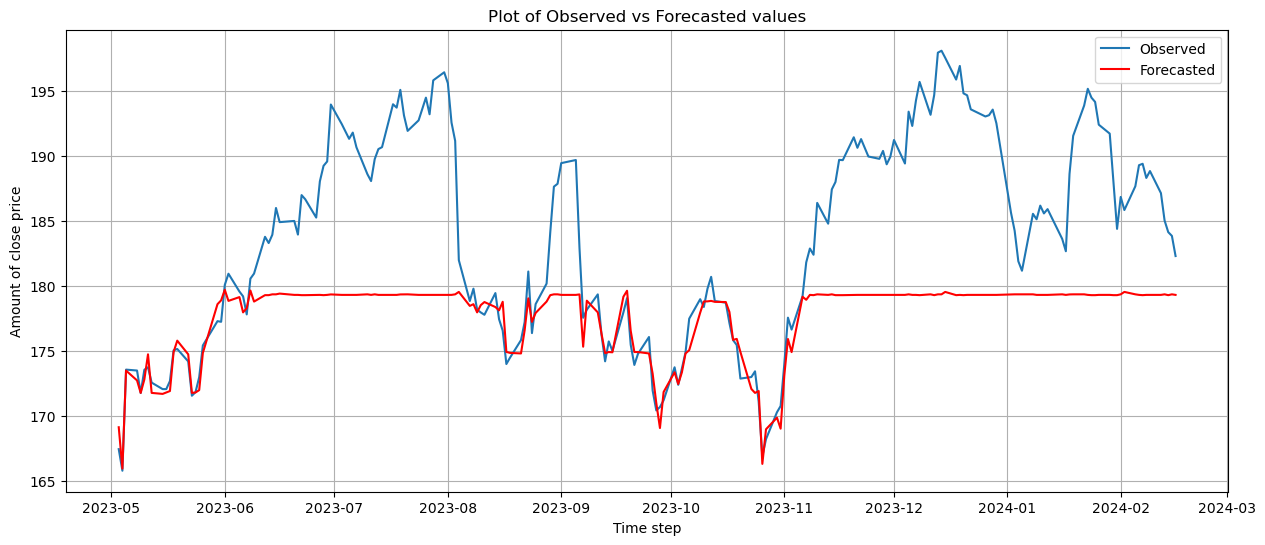

In [23]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined_2['close'], label='Observed')
plt.plot(combined_2[0], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

In [24]:
#add additional predictors to the model
#calculate the mean close price in certain days and  find the ratio between today's closing price and that of the periods
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = data.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    data[ratio_column] = data["close"] / rolling_averages["close"]
    
    trend_column = f"Trend_{horizon}"
    data[trend_column] = data.shift(1).rolling(horizon).sum()["close"]
    
    
    
    new_predictors+= [ratio_column, trend_column]

In [25]:
data['mom'] = data['close'].pct_change(12) # 12 month change

In [26]:
#Create the RSI indicator
#data['rsi' + str(n)] = talib.RSI(data['close'].values, timeperiod=horizon)
def computeRSI (data, time_window):
    diff = data.diff(1).dropna()        # diff in one field(one day)

    #this preservers dimensions off diff values
    up_chg = 0 * diff
    down_chg = 0 * diff
    
    # up change is equal to the positive difference, otherwise equal to zero
    up_chg[diff > 0] = diff[ diff>0 ]
    
    # down change is equal to negative deifference, otherwise equal to zero
    down_chg[diff < 0] = diff[ diff < 0 ]
    
    
    # we set com=time_window-1 so we get decay alpha=1/time_window
    up_chg_avg   = up_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    down_chg_avg = down_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    
    rs = abs(up_chg_avg/down_chg_avg)
    rsi = 100 - 100/(1+rs)
    return rsi

In [27]:
data['RSI']= computeRSI(data['close'], 14)

In [28]:
data.head()

,open,high,low,close,volume,Tomorrow,previousday,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000,mom,RSI
date,,,,,,,,,,,,,,,,,,,
1994-02-22,0.323661,0.334821,0.319196,0.332589,214569600,0.332589,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-02-23,0.332589,0.341518,0.330357,0.332589,260534400,0.327009,0.332589,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-02-24,0.330357,0.332589,0.323661,0.327009,197859200,0.321429,0.332589,0.991540,0.665178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-02-25,0.330357,0.332589,0.316964,0.321429,236824000,0.325893,0.327009,0.991395,0.659598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-02-28,0.323661,0.330357,0.321429,0.325893,123827200,0.323661,0.321429,1.006896,0.648438,0.993874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
data.shape 

(7550, 19)

In [30]:
new_data=data[new_predictors]
new_data['close']=data['close']
new_data['MOM']=data['mom']
new_data.head()

,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000,close,MOM
date,,,,,,,,,,,,
1994-02-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.332589,NaN
1994-02-23,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.332589,NaN
1994-02-24,0.991540,0.665178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.327009,NaN
1994-02-25,0.991395,0.659598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.321429,NaN
1994-02-28,1.006896,0.648438,0.993874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.325893,NaN


In [31]:
new_data['SMA_3'] = new_data.iloc[:,10].rolling(window=3).mean()
new_data['SMA_4'] = new_data.iloc[:,10].rolling(window=4).mean()

In [32]:
new_data['CMA_4'] = new_data['close'].expanding(min_periods=4).mean()

In [33]:
new_data['EMA'] = new_data.iloc[:,10].ewm(span=40,adjust=False).mean()

In [34]:
new_data=new_data.dropna()
new_data.shape 

(6550, 16)

In [35]:
new_data.head()

,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000,close,MOM,SMA_3,SMA_4,CMA_4,EMA
date,,,,,,,,,,,,,,,,
1998-02-06,1.005096,0.326450,1.015790,0.811382,1.094846,9.053850,1.021707,40.391747,0.639441,258.485246,0.165179,-0.021486,0.163876,0.163783,0.258392,0.158403
1998-02-09,1.018241,0.328683,1.036463,0.813057,1.134621,9.052176,1.058854,40.417417,0.663617,258.317836,0.171317,-0.003247,0.166667,0.165737,0.258305,0.159033
1998-02-10,1.006472,0.336496,1.037358,0.826450,1.147354,9.059430,1.071777,40.448667,0.672662,258.156564,0.173549,-0.003205,0.170015,0.168387,0.258221,0.159741
1998-02-11,0.988619,0.344866,1.005957,0.836495,1.120429,9.075613,1.046991,40.481591,0.657910,258.003104,0.169643,-0.022507,0.171503,0.169922,0.258132,0.160224
1998-02-12,1.009771,0.343192,1.014397,0.843192,1.141489,9.084542,1.066934,40.507261,0.671292,257.851318,0.172991,0.013071,0.172061,0.171875,0.258048,0.160847


## Exploratory data analysis

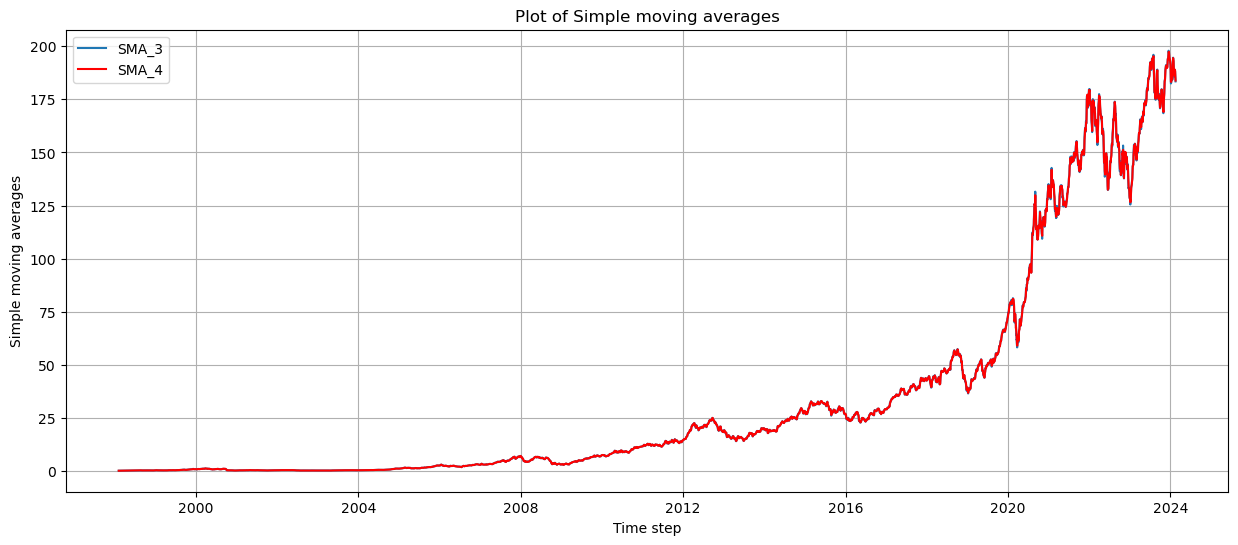

In [36]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['SMA_3'], label='SMA_3')
plt.plot(new_data['SMA_4'], color='r', label='SMA_4')
plt.title('Plot of Simple moving averages')
plt.ylabel('Simple moving averages')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

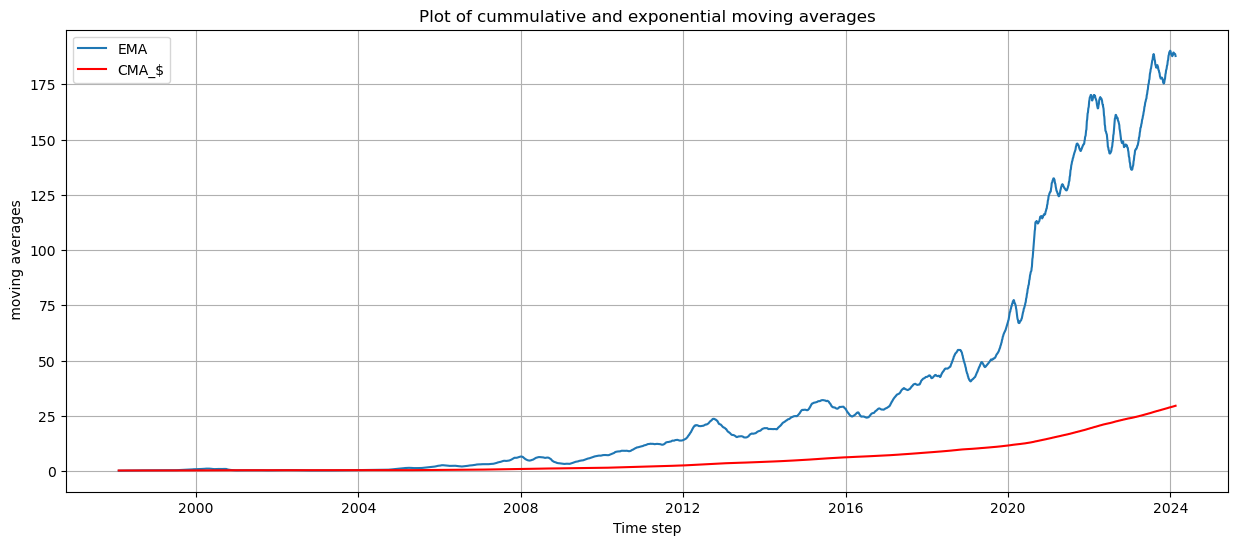

In [37]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['EMA'], label='EMA')
plt.plot(new_data['CMA_4'], color='r', label='CMA_$')
plt.title('Plot of cummulative and exponential moving averages')
plt.ylabel(' moving averages')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

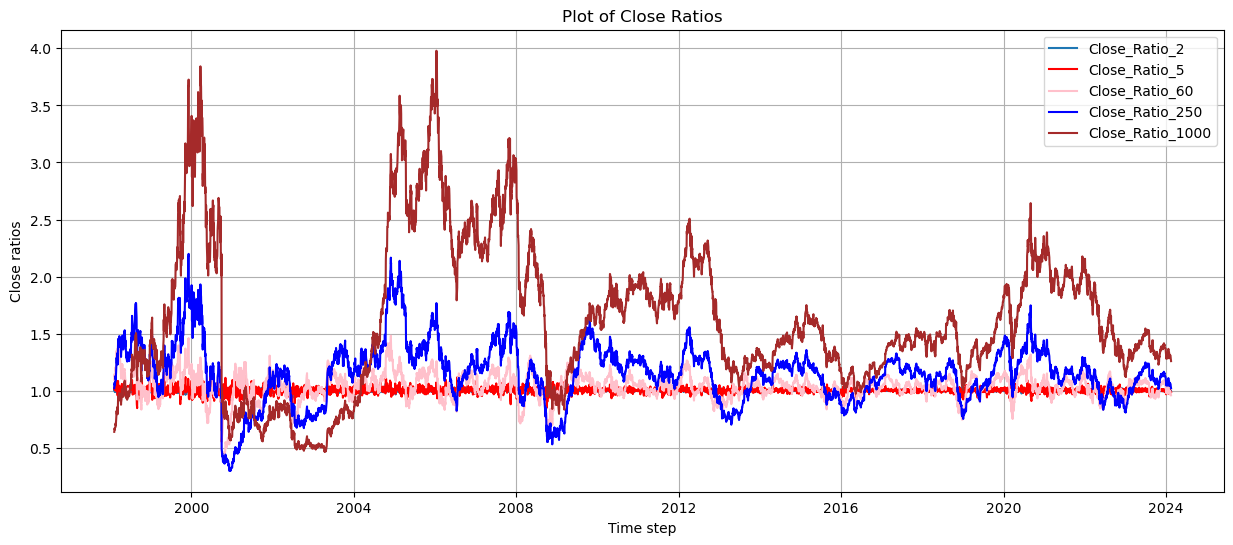

In [38]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['Close_Ratio_2'], label='Close_Ratio_2')
plt.plot(new_data['Close_Ratio_5'], color='r', label='Close_Ratio_5')
plt.plot(new_data['Close_Ratio_60'], color='pink', label='Close_Ratio_60')
plt.plot(new_data['Close_Ratio_250'], color='b', label='Close_Ratio_250')
plt.plot(new_data['Close_Ratio_1000'], color='brown', label='Close_Ratio_1000')
#plt.plot(new_data['close'], color='g', label='Close_Ratio_2')
plt.title('Plot of Close Ratios')
plt.ylabel('Close ratios')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

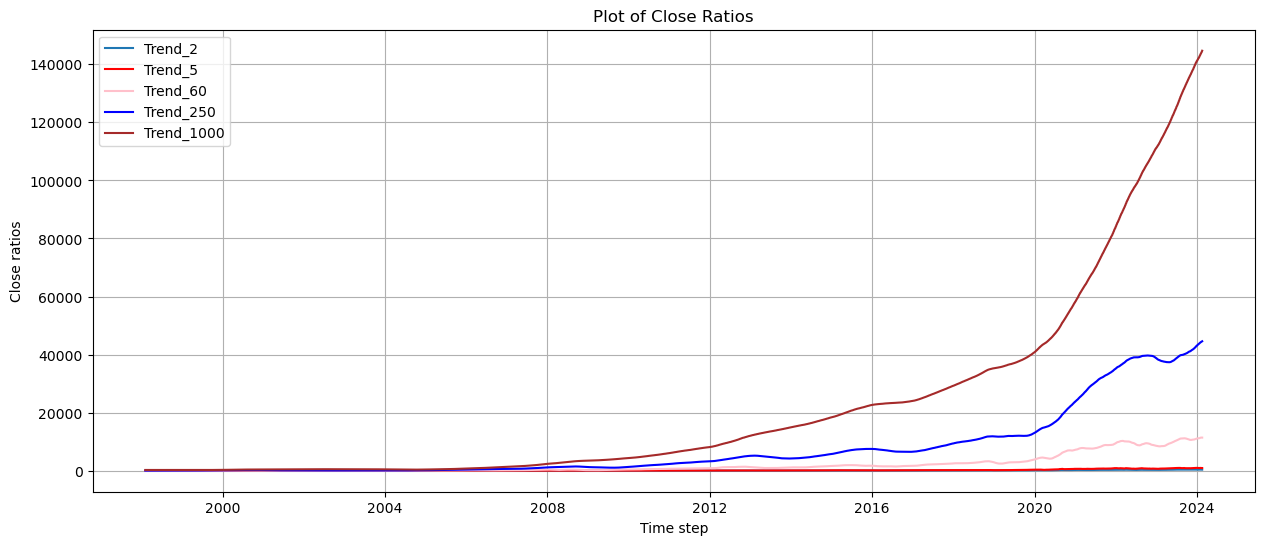

In [39]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['Trend_2'], label='Trend_2')
plt.plot(new_data['Trend_5'], color='r', label='Trend_5')
plt.plot(new_data['Trend_60'], color='pink', label='Trend_60')
plt.plot(new_data['Trend_250'], color='b', label='Trend_250')
plt.plot(new_data['Trend_1000'], color='brown', label='Trend_1000')
#plt.plot(new_data['close'], color='g', label='Close_Ratio_2')
plt.title('Plot of Close Ratios')
plt.ylabel('Close ratios')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

In [40]:
new_data['RSI']=data['RSI']
new_data['previousday']=data['previousday']

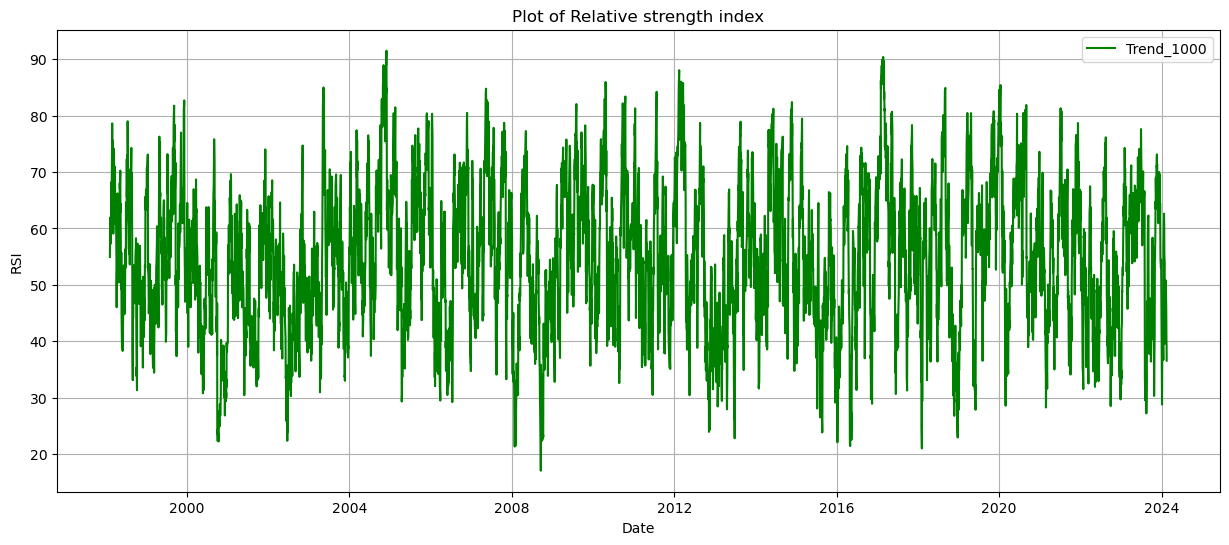

In [41]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['RSI'], color='g', label='Trend_1000')
#plt.plot(new_data['close'], color='g', label='Close_Ratio_2')
plt.title('Plot of Relative strength index')
plt.ylabel('RSI')
plt.xlabel('Date')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

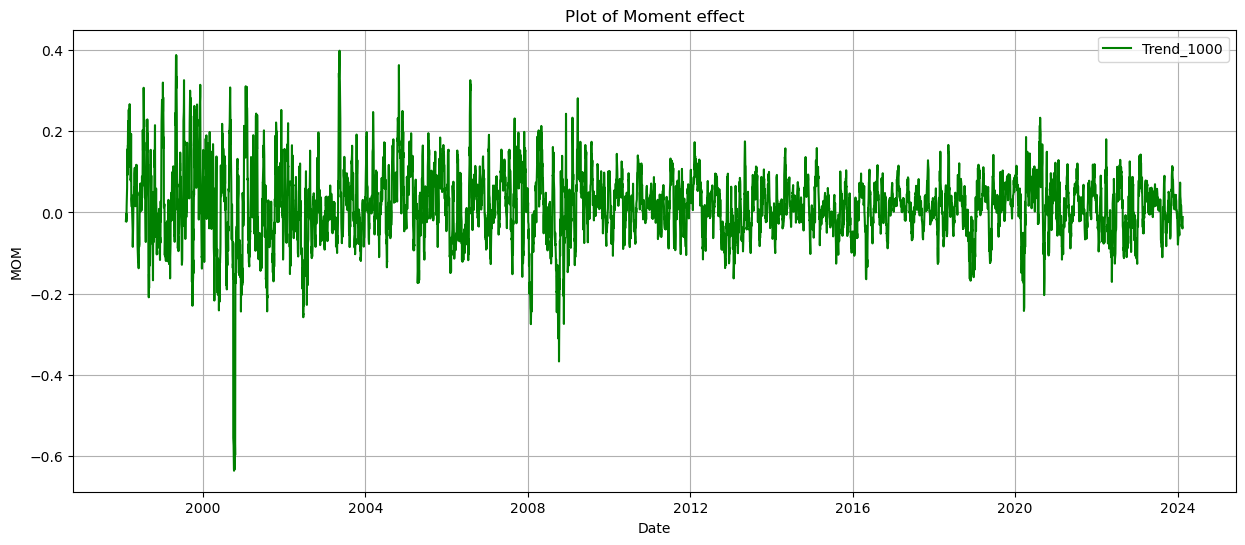

In [42]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['MOM'], color='g', label='Trend_1000')
#plt.plot(new_data['close'], color='g', label='Close_Ratio_2')
plt.title('Plot of Moment effect')
plt.ylabel('MOM')
plt.xlabel('Date')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

In [43]:
new_data.columns

Index(['Close_Ratio_2', 'Trend_2', 'Close_Ratio_5', 'Trend_5',
       'Close_Ratio_60', 'Trend_60', 'Close_Ratio_250', 'Trend_250',
       'Close_Ratio_1000', 'Trend_1000', 'close', 'MOM', 'SMA_3', 'SMA_4',
       'CMA_4', 'EMA', 'RSI', 'previousday'],
      dtype='object')

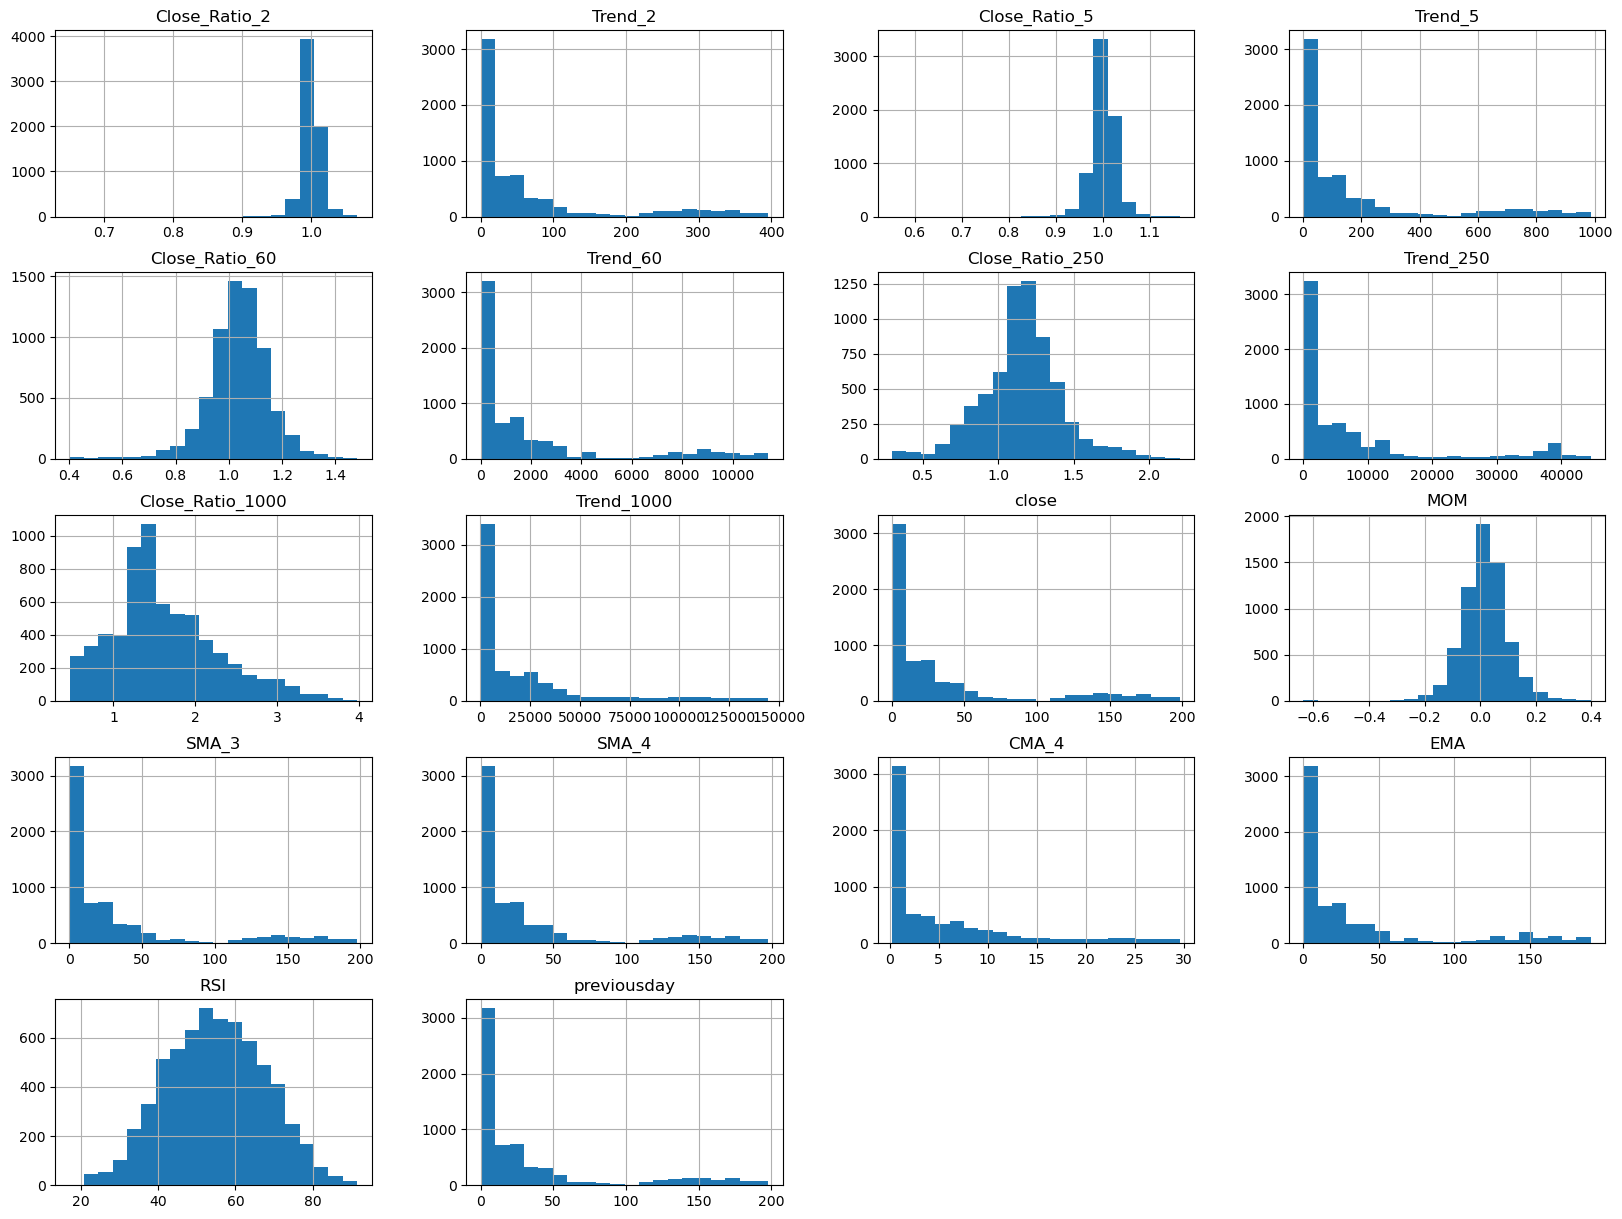

In [44]:
columns= ['Close_Ratio_2', 'Trend_2', 'Close_Ratio_5', 'Trend_5',
       'Close_Ratio_60', 'Trend_60', 'Close_Ratio_250', 'Trend_250',
       'Close_Ratio_1000', 'Trend_1000', 'close', 'MOM', 'SMA_3', 'SMA_4',
       'CMA_4', 'EMA', 'RSI', 'previousday']


new_data[columns].hist( bins=20, figsize=(20,15))
plt.savefig('charts_1.png');

<AxesSubplot:>

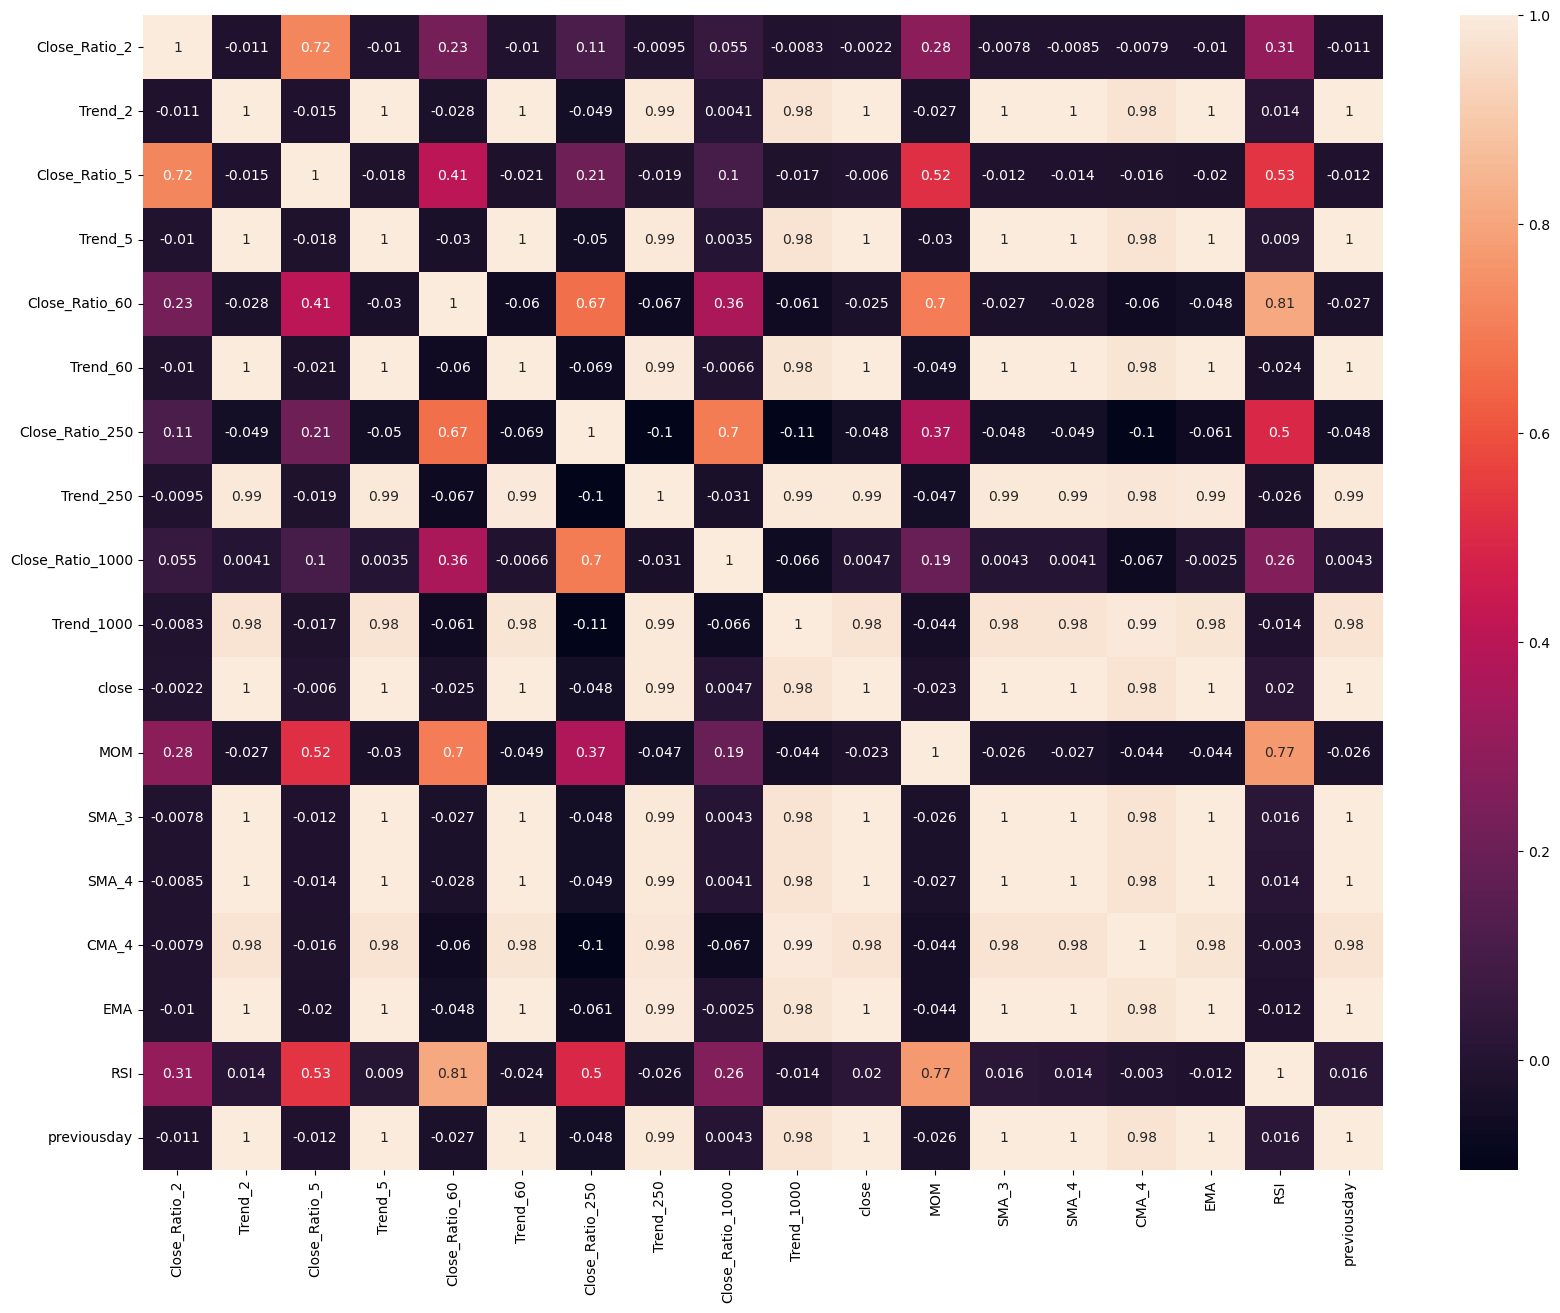

In [45]:
plt.figure(figsize=[20,15])
sns.heatmap(data=new_data.corr(), annot=True) 

In [46]:
train = new_data.iloc[:-200]
test = new_data.iloc[-200:]

In [47]:
train.shape

(6350, 18)

In [48]:
new_data.columns

Index(['Close_Ratio_2', 'Trend_2', 'Close_Ratio_5', 'Trend_5',
       'Close_Ratio_60', 'Trend_60', 'Close_Ratio_250', 'Trend_250',
       'Close_Ratio_1000', 'Trend_1000', 'close', 'MOM', 'SMA_3', 'SMA_4',
       'CMA_4', 'EMA', 'RSI', 'previousday'],
      dtype='object')

In [49]:
predictors= ['SMA_3','SMA_4','EMA','RSI','MOM','previousday'] 

#### Retrain the models on the new predictors

In [50]:
# creating a dictionary of Regressors to be experimented on.
models_dict = {
          'RF Regressor':RandomForestRegressor(random_state=0),
          'xgboost': XGBRegressor(),'Gradient Boost': GradientBoostingRegressor(random_state=0),
    'Catboostregressor':CatBoostRegressor(iterations=100, early_stopping_rounds=50)
         }

#looping through all the regressors, fitting and evaluating them on Cross validation and test data respectively
for key, model in models_dict.items():
    model.fit(train[predictors], train['close'])
    print(f'Performance of "{key}" on  Test set:')
    print('=='*28)
    print ( 'Test set:')
    print("**"*8)
    evaluate_model(model,test[predictors], test['close'])

Performance of "RF Regressor" on  Test set:
Test set:
****************
MAE: 7.46
MAPE: 0.04
minae: 0.14
maxae: 18.40
medae: 6.21

Performance of "xgboost" on  Test set:
Test set:
****************
MAE: 7.81
MAPE: 0.04
minae: 0.01
maxae: 18.52
medae: 7.05

Performance of "Gradient Boost" on  Test set:
Test set:
****************
MAE: 7.63
MAPE: 0.04
minae: 0.01
maxae: 17.61
medae: 6.65

Learning rate set to 0.356466
0:	learn: 29.1952171	total: 8.64ms	remaining: 855ms
1:	learn: 19.5324902	total: 15.8ms	remaining: 772ms
2:	learn: 13.2078598	total: 23.9ms	remaining: 771ms
3:	learn: 9.0217480	total: 31.9ms	remaining: 766ms
4:	learn: 6.2479583	total: 38.6ms	remaining: 734ms
5:	learn: 4.5818553	total: 44.4ms	remaining: 696ms
6:	learn: 3.5583540	total: 50.3ms	remaining: 668ms
7:	learn: 2.9466803	total: 55.8ms	remaining: 642ms
8:	learn: 2.5857069	total: 61.7ms	remaining: 624ms
9:	learn: 2.3554097	total: 67.4ms	remaining: 607ms
10:	learn: 2.1168309	total: 71.2ms	remaining: 576ms
11:	learn: 1.97420

#### Improving the model

In [51]:
#model_1 = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)
#n_estimators=200, min_samples_split=50, random_state=1
model_2= GradientBoostingRegressor(random_state=0)

def predict(train, test, predictors_1, model_1):
    model_1.fit(train[predictors_1], train["Target"])
    preds_1 = model_1.predict_proba(test[predictors_1])[:,1]
    preds_1[preds_1 >=.6] = 1
    preds_1[preds_1 <.6] = 0
    preds_1 = pd.Series(preds_1, index=test.index, name="Predictions_1")
    combined_1 = pd.concat([test["Target"], preds_1], axis=1)
    return combined_1 

In [52]:
def predict(train, test, predictors, model_2):
    model_2.fit(train[predictors], train["close"])
    preds_2 = model_2.predict(test[predictors])
    preds_2 = pd.Series(preds_2, index=test.index, name="Predictions_2")
    combined_2 = pd.concat([test["close"], preds_2], axis=1)
    return combined_2

In [53]:
def backtest(new_data, model_2, predictors, start=1500, step=250):
    all_predictions = []

    for i in range(start, new_data.shape[0], step):
        train = new_data.iloc[0:i].copy()
        test = new_data.iloc[i:(i+step)].copy()
        predictions_2 = predict(train, test, predictors, model_2)
        all_predictions.append(predictions_2)
    
    return pd.concat(all_predictions)

In [54]:
predictions_2 = backtest(new_data, model_2, predictors)

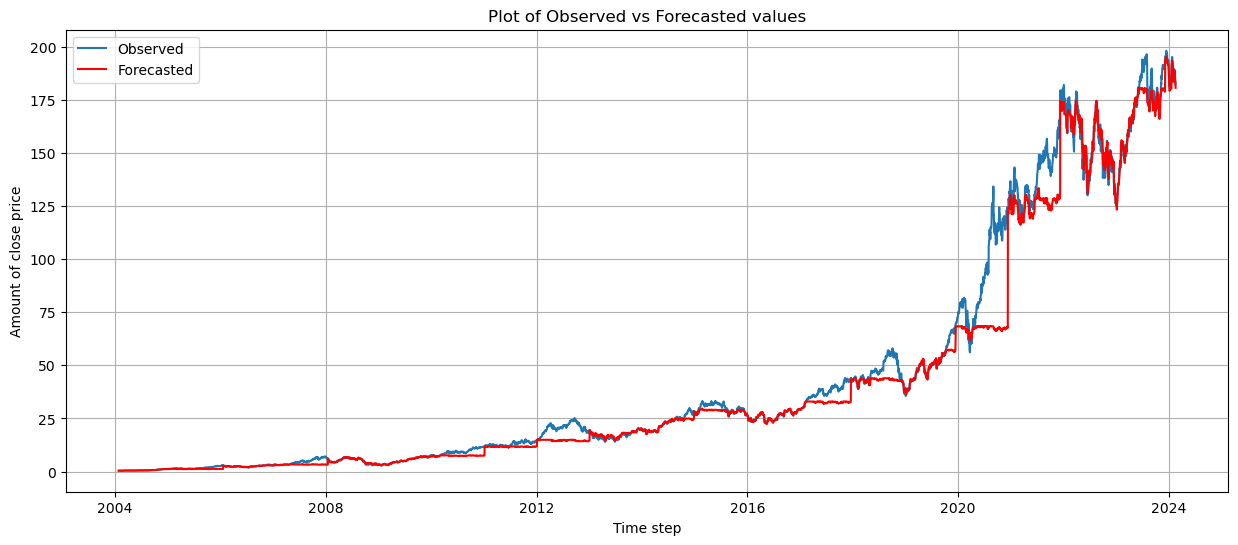

In [55]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(predictions_2['close'], label='Observed')
plt.plot(predictions_2['Predictions_2'], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

In [56]:
model_2.fit(train[predictors], train['close'])
prediction=model_2.predict(test[predictors])

In [57]:
mape= mean_absolute_percentage_error(test['close'], prediction)
mae=mean_absolute_error(test['close'], prediction)

In [58]:
print('mean absolute percentage error is : {}\n'.format(mape))
print('mean absolute  error is : {}\n'.format(mae))

mean absolute percentage error is : 0.04056106917565206

mean absolute  error is : 7.630605095999257



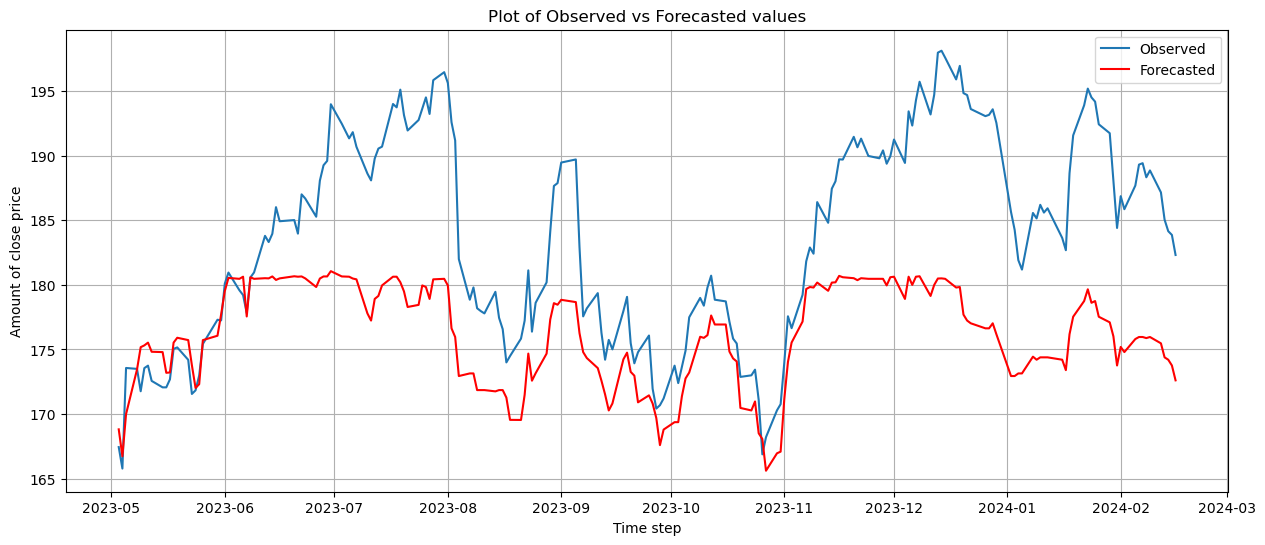

In [59]:
# Plot the test predictions and true values
pred= pd.Series(prediction, index=test.index)
plt.figure(figsize=(15,6))
plt.plot(test['close'], label='Observed')
plt.plot(pred, color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

#### Perform Hyper parameter tuning using grid searchcv

#possibe hyperparameters for random forest
hyper = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 6]
}

from sklearn.model_selection import GridSearchCV

cv_model= GridSearchCV(GradientBoostingRegressor(), param_grid=hyper)
cv_model.fit(train[predictors], train['close'])

print(cv_model.best_score_)
print(cv_model.best_estimator_)

In [60]:
model = GradientBoostingRegressor(max_depth=7, n_estimators=350,  min_samples_split=5)
model.fit(train[predictors], train['close'])
prediction=model.predict(test[predictors])

In [61]:
grdb_mae =  mean_absolute_error(test['close'], prediction)
abs_errors= np.abs(np.array(prediction) - np.array(test['close']))
grdb_min_abs_errors= np.min(abs_errors)
grdb_max_abs_errors= np.max(abs_errors)
grdb_med_abs_errors= np.median(abs_errors)
grdb_mape = mean_absolute_percentage_error(test['close'], prediction)

In [62]:
print(f"Optimized Gradient boosting Performance Metrics \n\n \
gradientboost Mae: {grdb_mae} \n \
gradientboost minae: {grdb_min_abs_errors} \n \
gradientboost maxae: {grdb_max_abs_errors} \n \
gradientboost medae: {grdb_med_abs_errors} \n \
gradientboost Mape: {grdb_mape} \n \
 \n\n <-------------------------------------------------->\n")

Optimized Gradient boosting Performance Metrics 

 gradientboost Mae: 7.909177167594972 
 gradientboost minae: 0.0733296924561273 
 gradientboost maxae: 19.076444166092557 
 gradientboost medae: 7.0600131025918245 
 gradientboost Mape: 0.04204004949533076 
  

 <-------------------------------------------------->



In [63]:
pred= pd.Series(prediction, index=test.index)
combined= pd.concat([test['close'], pred],axis=1)
combined 

,close,0
date,,
2023-05-03,167.449997,168.850063
2023-05-04,165.789993,167.421075
2023-05-05,173.570007,170.151622
2023-05-08,173.500000,173.161019
2023-05-09,171.770004,175.082394
...,...,...
2024-02-12,187.149994,174.086653
2024-02-13,185.039993,173.788934
2024-02-14,184.149994,173.721613


In [64]:
mape= mean_absolute_percentage_error(test['close'], prediction)
mae=mean_absolute_error(test['close'], prediction)

In [65]:
print('mean absolute percentage error is : {}\n'.format(mape))
print('mean absolute  error is : {}\n'.format(mae))

mean absolute percentage error is : 0.04204004949533076

mean absolute  error is : 7.909177167594972



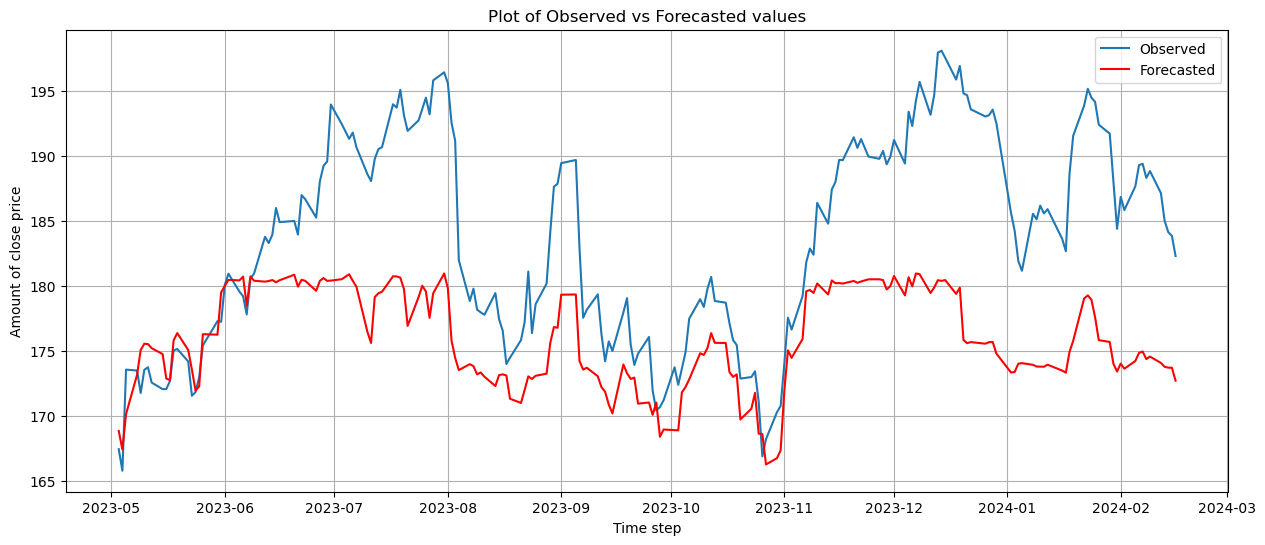

In [66]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined['close'], label='Observed')
plt.plot(combined[0], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

### Stacking and Bagging

In [67]:
# List of machine learning algorithms to consider
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso,ElasticNet 
algorithms = [
    ('Linear regression', LinearRegression(), {}),
    ('Ridge', Ridge(), {}),
    ('Lasso', Lasso(), {}),
    ('Elastic Net', ElasticNet(), {}),
    #('SVM', SVC(kernel='linear', probability=True, decision_function_shape='ovr'), {}),
    ('MLP', MLPRegressor(), {})
]

# Train base models
base_models = {}
for algorithm_name, algorithm, _ in algorithms:
    print(algorithm)
    model = algorithm
    model.fit(train[predictors], train['close'])
    base_models[algorithm_name] = model

eval_metrics = ['mae', 'mape']
results = pd.DataFrame(columns=['Algorithm'] + eval_metrics)

for algorithm_name, model in base_models.items():
    y_pred = model.predict(test[predictors])
    mae= mean_absolute_error(test['close'], y_pred)
    mape =mean_absolute_percentage_error(test['close'], y_pred)

# Ensembling using Bagging with all base models
bagging_model = BaggingRegressor(base_estimator=None, n_estimators=10, random_state=42)
bagging_model.fit(train[predictors], train['close'])
bagging_y_pred = bagging_model.predict(test[predictors])
bagging_mae = mean_absolute_error(test['close'], bagging_y_pred)
abs_errors= np.abs(np.array(bagging_y_pred) - np.array(test['close']))
bagg_min_abs_errors= np.min(abs_errors)
bagg_max_abs_errors= np.max(abs_errors)
bagg_med_abs_errors= np.median(abs_errors)
bagging_mape = mean_absolute_percentage_error(test['close'], bagging_y_pred)
print(f"Bagging Ensemble Method Performance Metrics \n\n \
bagging Mae: {bagging_mae} \n \
bagging minae: {bagg_min_abs_errors} \n \
bagging maxae: {bagg_max_abs_errors} \n \
bagging medae: {bagg_med_abs_errors} \n \
bagging Mape: {bagging_mape} \n \
 \n\n <-------------------------------------------------->\n")

# Ensembling using Stacking
meta_model = Ridge()
stacking_model = StackingRegressor(estimators=list(base_models.items()), final_estimator=meta_model)
stacking_model.fit(train[predictors], train['close'])
stacking_y_pred = stacking_model.predict(test[predictors])
stacking_mae =  mean_absolute_error(test['close'], stacking_y_pred)
abs_errors= np.abs(np.array(stacking_y_pred) - np.array(test['close']))
stack_min_abs_errors= np.min(abs_errors)
stack_max_abs_errors= np.max(abs_errors)
stack_med_abs_errors= np.median(abs_errors)
stacking_mape = mean_absolute_percentage_error(test['close'], stacking_y_pred)
print(f"Stacking Ensemble Method Performance Metrics \n\n \
stacking mae: {stacking_mae} \n \
stacking minae: {stack_min_abs_errors} \n \
stacking maxae: {stack_max_abs_errors} \n \
stacking medae: {stack_med_abs_errors} \n \
stacking mape: {stacking_mape} \n")




#print(f"Stacking F1 Score: {stacking_f1}")


LinearRegression()
Ridge()
Lasso()
ElasticNet()
MLPRegressor()
Bagging Ensemble Method Performance Metrics 

 bagging Mae: 7.224780424500011 
 bagging minae: 0.031991799999985915 
 bagging maxae: 18.37000150000003 
 bagging medae: 5.68449655000002 
 bagging Mape: 0.03825952760418259 
  

 <-------------------------------------------------->

Stacking Ensemble Method Performance Metrics 

 stacking mae: 1.1705308220153905 
 stacking minae: 0.005495603714905428 
 stacking maxae: 4.64316102077774 
 stacking medae: 0.9998796388491371 
 stacking mape: 0.006401317780762809 



In [68]:
bagging_y_pred= pd.Series(bagging_y_pred, index=test.index)
stacking_y_pred= pd.Series(stacking_y_pred, index=test.index)

In [69]:
combined_stack= pd.concat([test['close'], stacking_y_pred],axis=1)
combined_bagg= pd.concat([test['close'], bagging_y_pred], axis=1)

In [70]:
combined_bagg.head()

,close,0
date,,
2023-05-03,167.449997,168.994997
2023-05-04,165.789993,167.495996
2023-05-05,173.570007,169.240999
2023-05-08,173.500000,171.506000
2023-05-09,171.770004,174.424000


In [71]:
combined_stack.head()

,close,0
date,,
2023-05-03,167.449997,168.926724
2023-05-04,165.789993,167.037262
2023-05-05,173.570007,172.460629
2023-05-08,173.500000,171.275303
2023-05-09,171.770004,175.925848


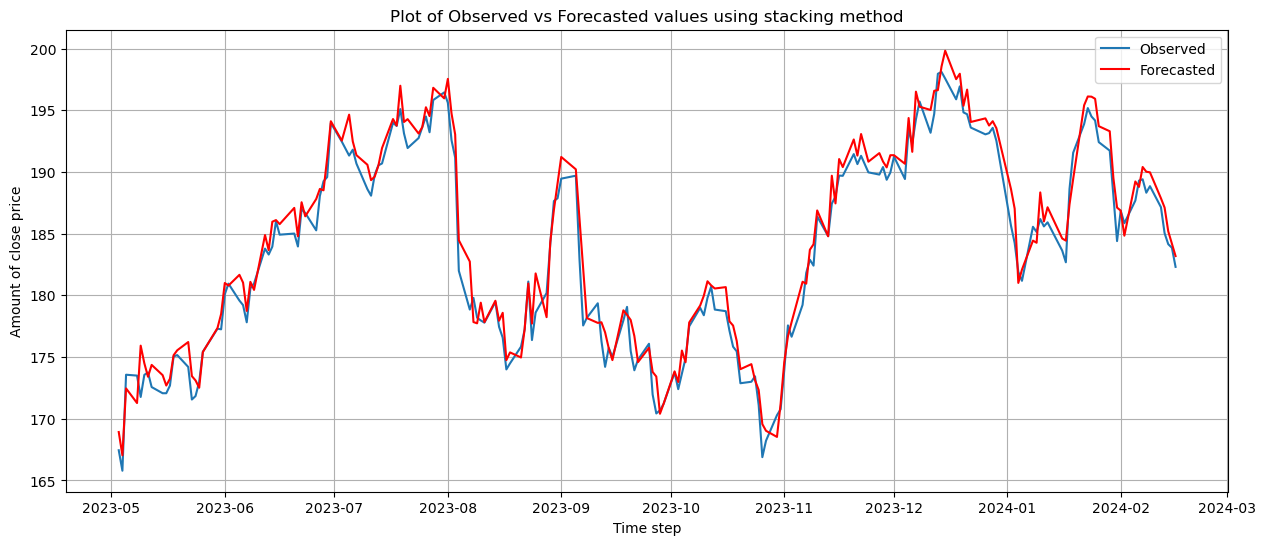

In [72]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined_stack['close'], label='Observed')
plt.plot(combined_stack[0], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values using stacking method')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

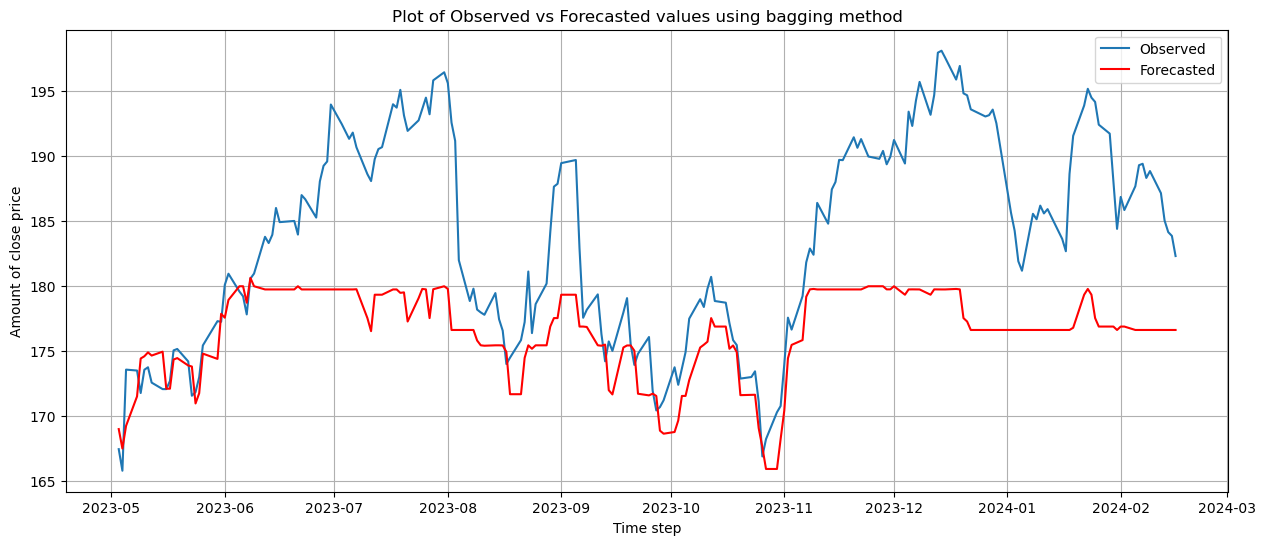

In [73]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined_bagg['close'], label='Observed')
plt.plot(combined_bagg[0], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values using bagging method')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

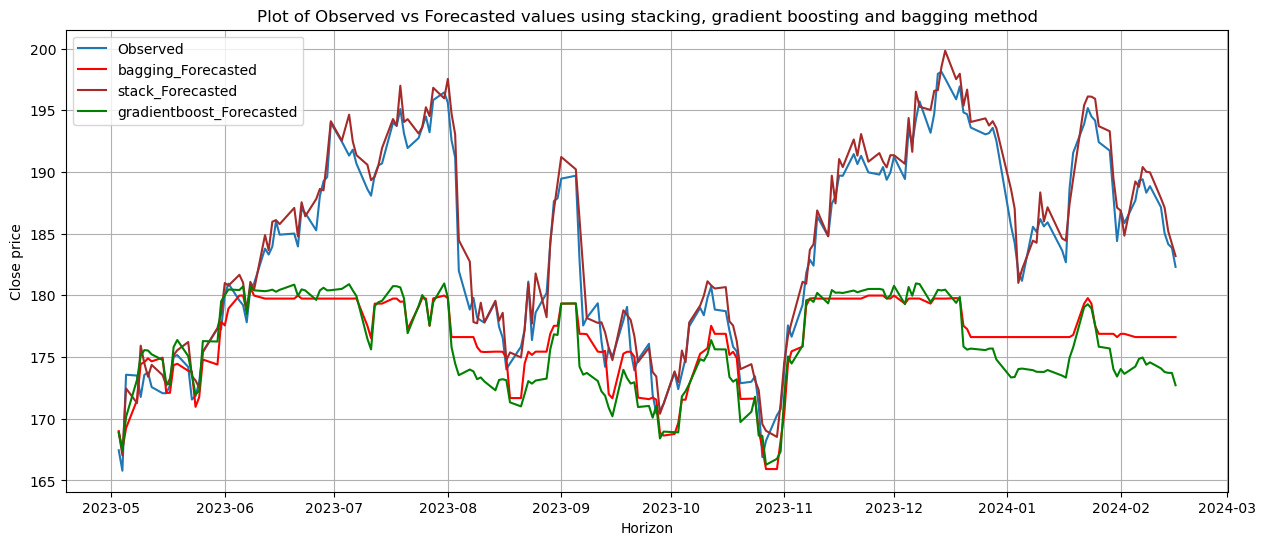

In [76]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined_bagg['close'], label='Observed')
plt.plot(combined_bagg[0], color='r', label='bagging_Forecasted')
plt.plot(combined_stack[0], color='brown', label='stack_Forecasted')
plt.plot(combined[0], color='green', label='gradientboost_Forecasted')
plt.title('Plot of Observed vs Forecasted values using stacking, gradient boosting and bagging method')
plt.ylabel('Close price')
plt.xlabel('Horizon')
plt.legend()
plt.grid()
plt.savefig('new_appleresult.png')
plt.show()

In [75]:
from prettytable import PrettyTable
import joblib
import os
# Constructing the result summary table containing the scores for each model on  test dataset.

task1_result = PrettyTable()
task1_result.field_names = ["Regressor", "MAE on Test","MAPE on Test", "MinAE on Test", "MaxAE on Test", "MedAE on Test"]
task1_result.add_row(['RF Reg', 7.46, 0.04, 0.14, 18.40, 6.21])
task1_result.add_row(['XGboost', 7.81, 0.04, 0.01, 18.52, 7.05])
task1_result.add_row(['GradientBoost', 7.63, 0.04, 0.01, 17.61, 6.65])
task1_result.add_row(['Catboost', 10.43, 0.06, 0.32, 20.32, 10.74])
task1_result.add_row(['Bagging', 7.22, 0.04, 0.03, 18.37, 5.68])
task1_result.add_row(['Stacking', 1.05, 0.01, 0.00, 4.30, 0.86])

print('Result Summary for All Regressors :')
print(task1_result)

Result Summary for All Regressors :
+---------------+-------------+--------------+---------------+---------------+---------------+
|   Regressor   | MAE on Test | MAPE on Test | MinAE on Test | MaxAE on Test | MedAE on Test |
+---------------+-------------+--------------+---------------+---------------+---------------+
|     RF Reg    |     7.46    |     0.04     |      0.14     |      18.4     |      6.21     |
|    XGboost    |     7.81    |     0.04     |      0.01     |     18.52     |      7.05     |
| GradientBoost |     7.63    |     0.04     |      0.01     |     17.61     |      6.65     |
|    Catboost   |    10.43    |     0.06     |      0.32     |     20.32     |     10.74     |
|    Bagging    |     7.22    |     0.04     |      0.03     |     18.37     |      5.68     |
|    Stacking   |     1.05    |     0.01     |      0.0      |      4.3      |      0.86     |
+---------------+-------------+--------------+---------------+---------------+---------------+
